<h1>Summary of Code </h1>
<p>
The code that I will be utilizing for this Lab is from the first assignment in the STA 141 class from Winter '16 and is in the R language. The assignment involved a large dataset of vehicles that are for sale taken from a website and analysis of the data to answer over sixteen questions. The questions and the data set can be found at <a href="http://eeyore.ucdavis.edu/sta141/Hws/assignment1.html">this course webpage</a></p>

<h2>Preliminary Steps</h2>
<p>
The first thing that I did with this code was to look at the size of the dataset, the variables, and the types of the variables. To do this I ran the following code to find that the data gives 34677 values to work with  and has twenty-six different variables being mostly numeric or character values.
</p>

In [19]:
load("C:/Users/Spencer/OneDrive - UC Davis/School/Old/College Junior/STA 141/Assignment 1/vehicles.rda")
nrow(vposts)
names(vposts)
lapply(vposts, class)

[1] 34677

[1] "id"           "title"        "body"         "lat"          "long"        
 [6] "posted"       "updated"      "drive"        "odometer"     "type"        
[11] "header"       "condition"    "cylinders"    "fuel"         "size"        
[16] "transmission" "byOwner"      "city"         "time"         "description" 
[21] "location"     "url"          "price"        "year"         "maker"       
[26] "makerMethod"

$id
[1] "character"

$title
[1] "character"

$body
[1] "character"

$lat
[1] "numeric"

$long
[1] "numeric"

$posted
[1] "POSIXct" "POSIXt" 

$updated
[1] "POSIXct" "POSIXt" 

$drive
[1] "factor"

$odometer
[1] "integer"

$type
[1] "factor"

$header
[1] "character"

$condition
[1] "factor"

$cylinders
[1] "integer"

$fuel
[1] "factor"

$size
[1] "factor"

$transmission
[1] "factor"

$byOwner
[1] "logical"

$city
[1] "factor"

$time
[1] "POSIXct" "POSIXt" 

$description
[1] "character"

$location
[1] "character"

$url
[1] "character"

$price
[1] "integer"

$year
[1] "integer"

$maker
[1] "character"

$makerMethod
[1] "numeric"

<h2>Visualization of data</h2>
<p>
I then decided to visualize the data using a histogram to see the distribution of the data and see if there are any possible outliers that may be influenceing the data at all. Then using this I could see that there was an issue with the data in that there were some extreme outliers that apparently cost upwards of six hundred million dollars. I assumed there was a massive problem in this and decided to solve it by looking at those special cases through the URL, header, and other variables to see if the price was put up in error or if it needed changing to a more manageable price.
</p>

$`10%`
NULL

$`20%`
NULL

$`30%`
NULL

$`40%`
NULL

$`50%`
NULL

$`60%`
NULL

$`70%`
NULL

$`80%`
NULL

$`90%`
NULL

$`100%`
NULL


[1] 600030000

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
        1      2995      6700     49450     13500 600000000      3328 

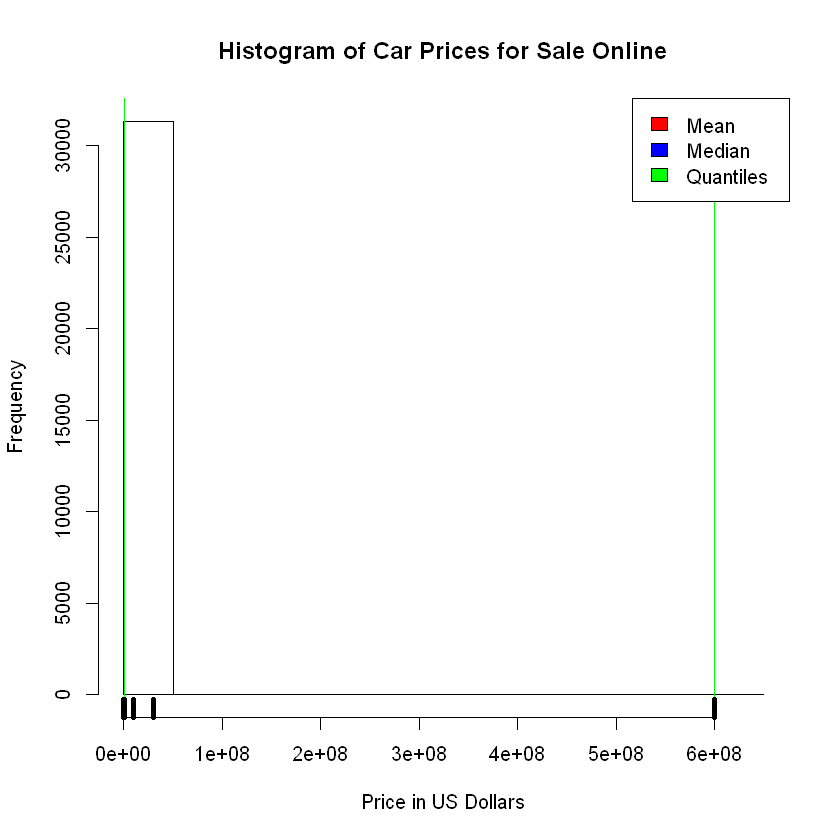

In [20]:
meanprice=mean(vposts$price, na.rm=TRUE)
medianprice=median(vposts$price, na.rm = TRUE)
pricequanitle=quantile(vposts$price, c(.1, .2, .3, .4, .5, .6, .7, .8, .9, 1),na.rm = TRUE)
hist(vposts$price, main="Histogram of Car Prices for Sale Online", xlab="Price in US Dollars")
abline(v=meanprice, col="red")
abline(v=medianprice, col="blue")
lapply(pricequanitle, function(r) abline(v=r, col="green"))
legend("topright", legend=c("Mean","Median", "Quantiles"), fill = c("red","blue","green"))
rug(vposts$price,lwd=4)
max(vposts$price, na.rm=TRUE)
summary(vposts$price)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =5000

<p> By doing this I am looking for the max price, then analyzing the details of the vehicle using the other variables (the subset which I have commented out to avoid unnecessary complexity in the markdown) and then modifying the price using the information given by the subset. For example, the car that cost 600 million dollars actually was priced in a range of 6,000 to 30,000 dollars which was read as over 600 million dollars by combining the two numbers. I changed this by making the price into the average.
</p>
<p>For the remaining they were cars that were overpriced for the quality of car so I changed their prices to their Kelly Blue Book values in order to make them more accurate. The most expensive car then is a 2006 Ford GT priced at 300,000 dollars.
</p>
<p> After this we can run the histogram again to get a more accurate histogram of the data which, while still heavily skewed right is still a better estimate, showing that most values are less than 20,000 dollars. </p>

In [21]:
max(vposts$price, na.rm=TRUE)
#subset(vposts, vposts$price==600030000)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =18000
max(vposts$price, na.rm=TRUE)
#subset(vposts, vposts$price==30002500)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =3500
max(vposts$price, na.rm=TRUE)
#subset(vposts, vposts$price==9999999)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =1700
max(vposts$price, na.rm=TRUE)
#subset(vposts, vposts$price==569500)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =6300
max(vposts$price, na.rm=TRUE)
#subset(vposts, vposts$price==559500)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =10100
max(vposts$price, na.rm=TRUE)
#subset(vposts, vposts$price==400000)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =300000
max(vposts$price, na.rm=TRUE)
#subset(vposts, vposts$price==359000)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =19400
max(vposts$price, na.rm=TRUE)

[1] 30002500

[1] 9999999

[1] 569500

[1] 559500

[1] 4e+05

[1] 359000

[1] 3e+05

[1] 286763

$`10%`
NULL

$`20%`
NULL

$`30%`
NULL

$`40%`
NULL

$`50%`
NULL

$`60%`
NULL

$`70%`
NULL

$`80%`
NULL

$`90%`
NULL

$`100%`
NULL


[1] 286763

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      1    2995    6700    9835   13500  286800    3328 

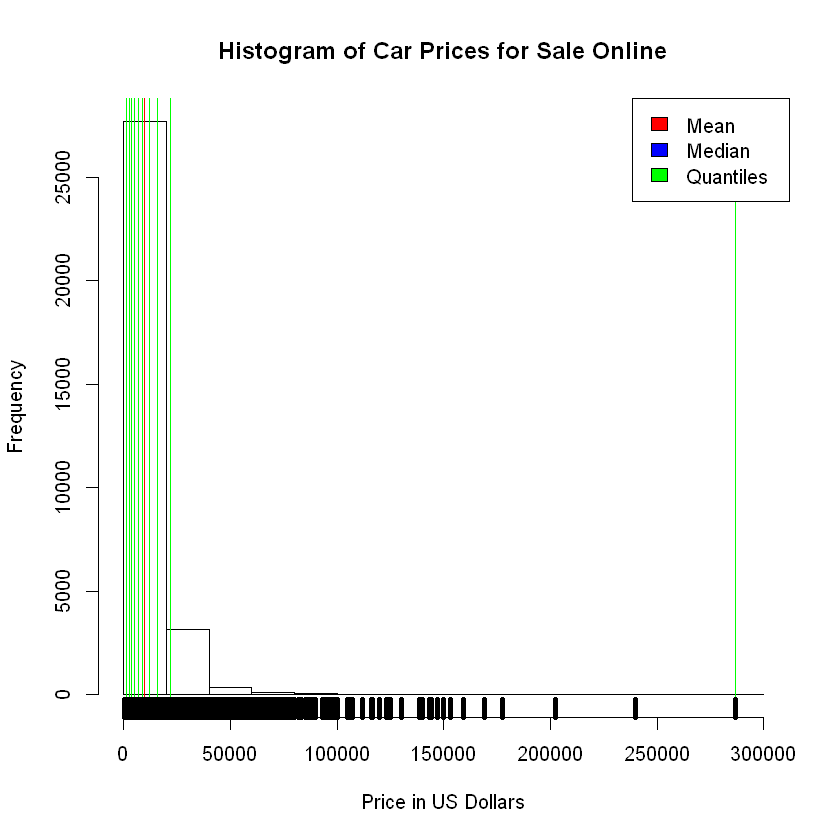

In [22]:
meanprice=mean(vposts$price, na.rm=TRUE)
medianprice=median(vposts$price, na.rm = TRUE)
pricequanitle=quantile(vposts$price, c(.1, .2, .3, .4, .5, .6, .7, .8, .9, 1),na.rm = TRUE)
hist(vposts$price, main="Histogram of Car Prices for Sale Online", xlab="Price in US Dollars")
abline(v=meanprice, col="red")
abline(v=medianprice, col="blue")
lapply(pricequanitle, function(r) abline(v=r, col="green"))
legend("topright", legend=c("Mean","Median", "Quantiles"), fill = c("red","blue","green"))
rug(vposts$price,lwd=4)
max(vposts$price, na.rm=TRUE)
summary(vposts$price)
vposts$price [ !is.na(vposts$price) & vposts$price == max(vposts$price, na.rm = TRUE) ] =5000

<h2>Location of Vehicles being Sold</h2>
<p>We are also interested in where these vehicles are being sold throughout the United States, first through we want to first look at what cities the data set takes data from.</p>


In [23]:
unique(vposts$city)

[1] boston   chicago  denver   lasvegas nyc      sac      sfbay   
Levels: boston chicago denver lasvegas nyc sac sfbay

<p>We see that the main places that are taken from are Boston, Chicago, Denver, Las Vegas, New York City, and the San Francisco Bay Area.
</p>
<p>The data also gives us the longitude and lattitude of the locations and lets us be able to then place these onto a map of the United States to see the locations.</p>

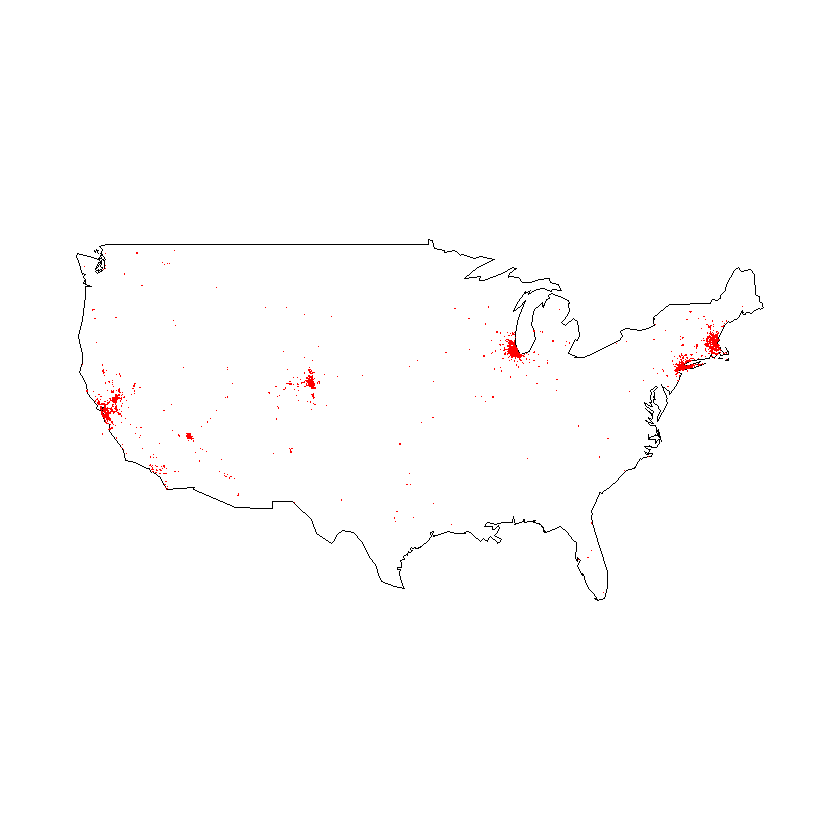

In [24]:
library(maps)
map(database="usa")
points(vposts$long, vposts$lat, col="red",pch=".")

<p>We see that there is concentrations around all of these metropolitan areas that are referenced above but that there are also some in locations that are far from these areas with some places that are in Texas, Southern California, Arizona, Florida and the Pacific Northwest</p>

<h2>Analyzing How the Number miles driven relates to Price and Age</h2>
<p>We then want to look at how the miles driven on a car, or as we will call it, odometer. We will also change all cars who have an odometer larger than one million to equal one million to fix some of the outliers that we have as well as adding a new variable called "Age" which takes the year and then subtracts it by the year of the car (the second line of code deals with an outlier in the data). We then create a smooth scatter plot to view the data and see what it looks like. </p>

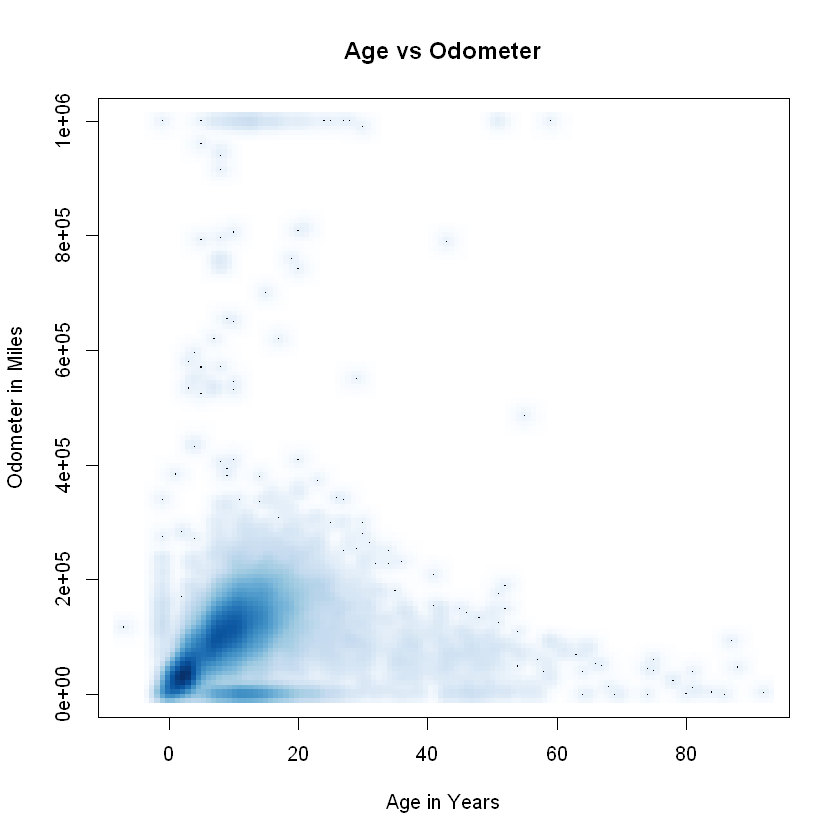

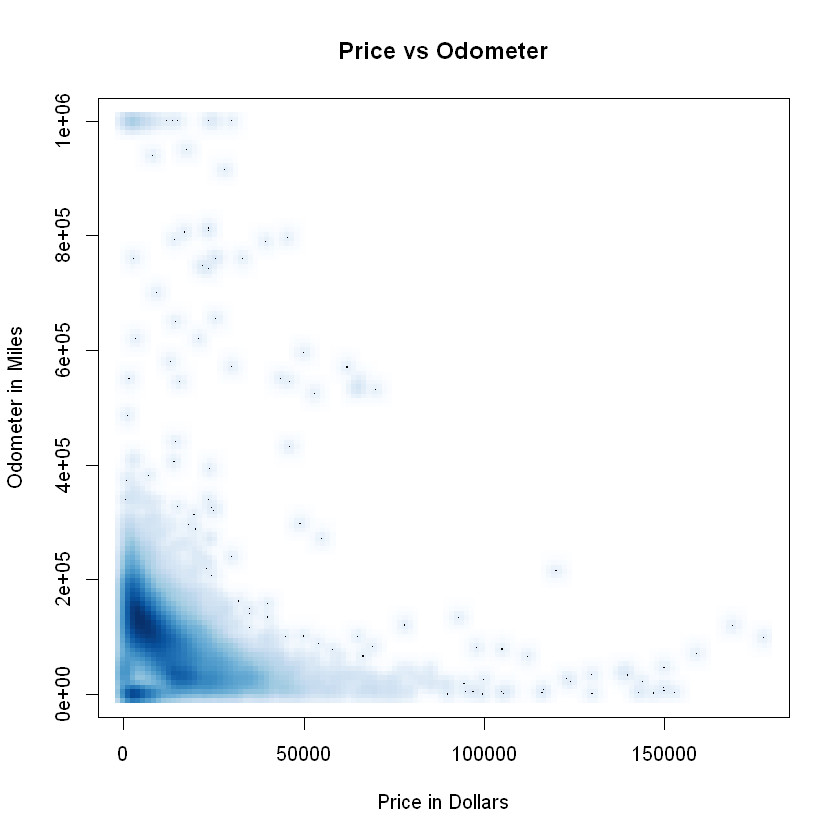

In [25]:
vposts[which(vposts$odometer > 1e6),"odometer"] = 1e6
vposts$age=2015-vposts$year
vposts$age[vposts$age==2011] =4
smoothScatter(vposts$age,vposts$odometer,ylim=range(vposts$odometer, na.rm = TRUE), main="Age vs Odometer", xlab="Age in Years",ylab="Odometer in Miles" )
smoothScatter(vposts$price, vposts$odometer,ylim=range(vposts$odometer, na.rm = TRUE), main="Price vs Odometer", xlab="Price in Dollars",ylab="Odometer in Miles" )


<p>From this we can see in the first graph that there is a strong correlation visual between the miles driven and the age of the car. However, there are many cars that also have close to zero miles on it and are incredibly old, I decided that these may be vintage cars or perhaps the bodies of cars that cannot particularly have an odometer count but can still be sold as cars.
</p>
<p>When looking at Odometer against price we see that many low price cars have higher odometers with a particular bunch up in the top right who are sold at a low price and have close to the max miles driven that we have. Most of the more expensive cars as well have a low number of miles driven with most of the high milage cars caping out at some point.</p>

<h2>What about the older cars? </h2>
<p>We also want to look at some of the older cars, which we defined as cars whose make was before the year 2000, a year chosen due to the fact that the average age of a car was over ten years old, and wanted to see what were the main manufacturers of these old cars and what their prices tended to be as well.</p>

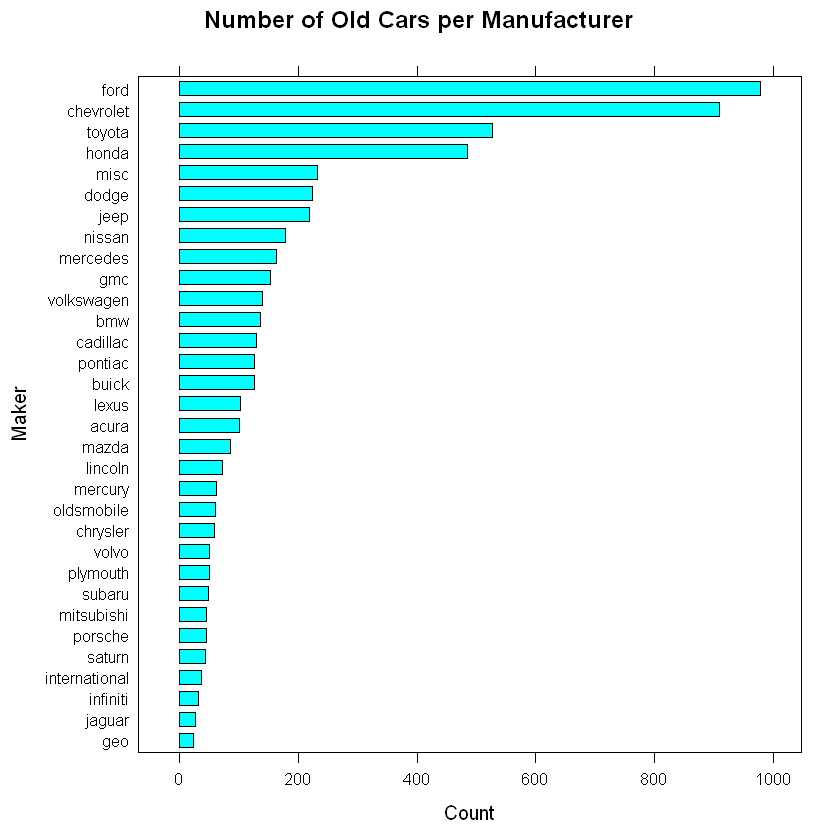

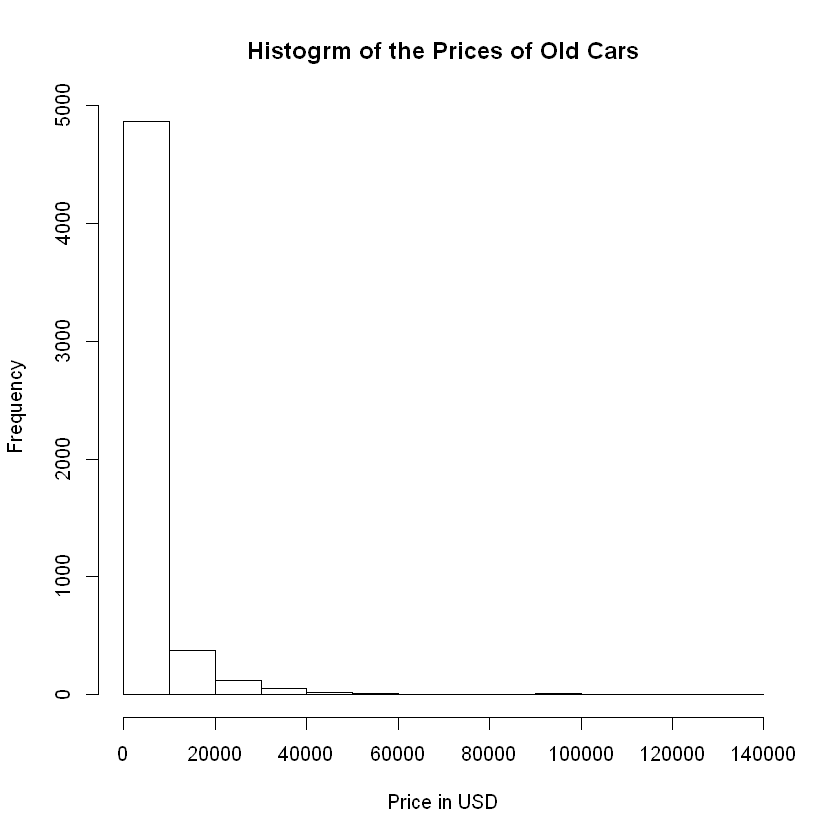

In [26]:
oldCars=subset(vposts,year<2000)
table=table(oldCars["maker"])
remove=names(table[table<20])
oldCars$newmaker=oldCars$maker

oldCars$newmaker[oldCars$newmaker %in% remove]="misc"
library(lattice)
output=sort(table(oldCars$newmaker))
barchart(output, main="Number of Old Cars per Manufacturer", xlab="Count",ylab="Maker")
hist(oldCars$price, xlab = "Price in USD", main="Histogrm of the Prices of Old Cars")

<p>We see that the oldest cars tend to be made by Ford, Chevrolet, and Toyota. This makes sense due to these cars being some of the largest car brands in the world, but it surprises me somewhat due to the fact that Honda, and Toyota were not higher up on the list.
</p>
<p>When looking at the price we still see the issue of being skewed the to right due to extreme outliers, possibly "classic" cars" whose prices are higher. Still we see that most of the cars are in the leftmost category being less than 10,000 dollars.</p>

<h2>Conclusion</h2>
<p>This assignment was one of my first forrays into working with incredibly large datasets and was one that I found both frustrating and incredibly enjoyable when things worked out in the end. I found out many interesting findings that I have shown here in this markdown analysis that I hope you enjoy as well.</p>